In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
import numpy as np




In [82]:
data = pd.read_csv('/Users/andrewmskorupa/Downloads/test_modified.csv')
data.head(15)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750,0.007565,107.8622,OUT049,10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300,0.038428,87.3198,OUT017,2,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600,0.099575,241.7538,OUT010,11,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,13.600,0.118599,234.2300,OUT027,24,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,FDH56,9.800,0.063817,117.1492,OUT046,12,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
6,FDL48,19.350,0.082602,50.1034,OUT018,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,FDC48,9.195,0.015782,81.0592,OUT027,24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,FDN33,6.305,0.123365,95.7436,OUT045,7,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
9,FDA36,5.985,0.005698,186.8924,OUT017,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [83]:
# Quick Exploratory Analysis of Weight

Avg_Weight = data['Item_Weight'].mean()
Max_Weight = data['Item_Weight'].max()
Min_Weight = data['Item_Weight'].min()

In [84]:
# Quick Exploratory Analysis of MRP
Avg_MRP = data['Item_MRP'].mean()
Max_MRP = data['Item_MRP'].max()
Min_MRP = data['Item_MRP'].min()

In [85]:
# Quick Exploratory Analysis of Item Visibility
Avg_Vis = data['Item_Visibility'].mean()
Max_Vis = data['Item_Visibility'].max()
Min_Vis = data['Item_Visibility'].min()

In [86]:
# Creat a summary dataframe

sumdf = pd.DataFrame({'Summary Item' : ['Average Weight', 'Maximum Weight', 'Minimum Weight', 'Average MRP', 'Maximum MRP', 'Minimum MRP', 'Average Visibility', 'Maximum Visibility', 'Minimum Visibility'],
                      'Value' : [Avg_Weight, Max_Weight, Min_Weight, Avg_MRP, Max_MRP, Min_MRP, Avg_Vis, Max_Vis, Min_Vis]})
sumdf

,Summary Item,Value
0,Average Weight,12.672996
1,Maximum Weight,21.350000
2,Minimum Weight,4.555000
3,Average MRP,141.023273
4,Maximum MRP,266.588400
5,Minimum MRP,31.990000
6,Average Visibility,0.069363
7,Maximum Visibility,0.323637
8,Minimum Visibility,0.003591


In [87]:
#Reset index for better readability

sumdf.set_index('Summary Item', inplace=True)
sumdf

,Value
Summary Item,
Average Weight,12.672996
Maximum Weight,21.350000
Minimum Weight,4.555000
Average MRP,141.023273
Maximum MRP,266.588400
Minimum MRP,31.990000
Average Visibility,0.069363
Maximum Visibility,0.323637
Minimum Visibility,0.003591


In [88]:
#Test inplace argument
sumdf

,Value
Summary Item,
Average Weight,12.672996
Maximum Weight,21.350000
Minimum Weight,4.555000
Average MRP,141.023273
Maximum MRP,266.588400
Minimum MRP,31.990000
Average Visibility,0.069363
Maximum Visibility,0.323637
Minimum Visibility,0.003591


In [89]:
x, y = data[['Item_Weight', 'Item_MRP']], data['Item_Visibility']

print(x)
print(y)

      Item_Weight  Item_MRP
0          20.750  107.8622
1           8.300   87.3198
2          14.600  241.7538
3           7.315  155.0340
4          13.600  234.2300
...           ...       ...
5676       10.500  141.3154
5677        7.600  169.1448
5678       10.000  118.7440
5679       15.300  214.6218
5680        9.500   79.7960

[5681 rows x 2 columns]
0       0.007565
1       0.038428
2       0.099575
3       0.015388
4       0.118599
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.088380
5680    0.104720
Name: Item_Visibility, Length: 5681, dtype: float64


In [90]:
x.shape


(5681, 2)

In [91]:
y.shape

(5681,)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42
)

In [93]:
#Work with the parameters
params = {
    "n_estimators": 1000,
    "max_depth": 8,
    "min_samples_split": 8,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


In [94]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0013


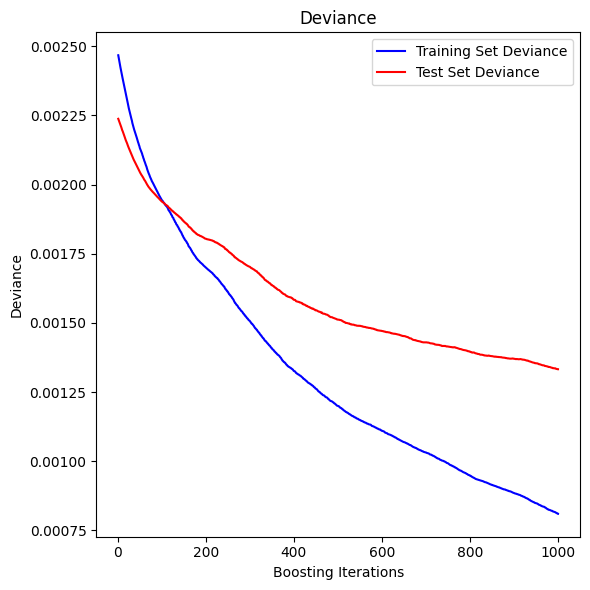

In [95]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()